In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import shutil
from tensorflow import keras

In [2]:
MODEL_PATH = 'E:/Projects/chubrik-kyrsach/saves/MobileNetV3Large'
INPUT_IMAGES_DIR = 'E:/Projects/chubrik-kyrsach/datasets/art-mini/validation'
OUTPUT_IMAGES_DIR = 'E:/Projects/chubrik-kyrsach/classification_results'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

dataset = keras.utils.image_dataset_from_directory(INPUT_IMAGES_DIR, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
classes_num = len(dataset.class_names)

Found 46519 files belonging to 13 classes.


In [4]:
data_augmentation = keras.Sequential([keras.layers.RandomFlip('horizontal'), keras.layers.RandomRotation(0.2)])
preprocess_input = keras.applications.mobilenet_v3.preprocess_input
rescale = keras.layers.Rescaling(1./127.5, offset=-1)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
image_batch, label_batch = next(iter(dataset))
feature_batch = base_model(image_batch)
base_model.trainable = False
global_average_layer = keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
prediction_layer = keras.layers.Dense(classes_num)
prediction_batch = prediction_layer(feature_batch_average)
inputs = keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = keras.Model(inputs, outputs)
model.compile()

In [5]:
model.load_weights(MODEL_PATH)

In [6]:
try:
    shutil.rmtree(OUTPUT_IMAGES_DIR)
except:
    pass
os.mkdir(OUTPUT_IMAGES_DIR)

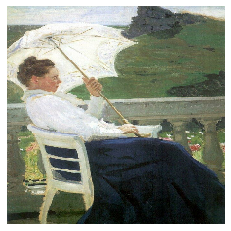

In [31]:
def arrayToIndexSort(predictions):
    l = list(predictions)
    cp = list(predictions)
    l.sort(reverse=True)
    return cp.index(l[0]), cp.index(l[1])

image_batch, label_batch = dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

plt.imshow(image_batch[0].astype("uint8"), interpolation='nearest')
plt.axis("off")
plt.show()